In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from scipy.ndimage import gaussian_filter1d

Air_Quality_Aotizhongxin = pd.read_csv('./air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Air_Quality_Changping = pd.read_csv('./air_quality/PRSA_Data_Changping_20130301-20170228.csv')
Air_Quality_Dingling = pd.read_csv('./air_quality/PRSA_Data_Dingling_20130301-20170228.csv')
Air_Quality_Dongsi = pd.read_csv('./air_quality/PRSA_Data_Dongsi_20130301-20170228.csv')
Air_Quality_Guanyuan = pd.read_csv('./air_quality/PRSA_Data_Guanyuan_20130301-20170228.csv')
Air_Quality_Gucheng = pd.read_csv('./air_quality/PRSA_Data_Gucheng_20130301-20170228.csv')
Air_Quality_Huairou = pd.read_csv('./air_quality/PRSA_Data_Huairou_20130301-20170228.csv')
Air_Quality_Nongzhanguan = pd.read_csv('./air_quality/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Air_Quality_Shunyi = pd.read_csv('./air_quality/PRSA_Data_Shunyi_20130301-20170228.csv')
Air_Quality_Tiantan = pd.read_csv('./air_quality/PRSA_Data_Tiantan_20130301-20170228.csv')
Air_Quality_Wanliu = pd.read_csv('./air_quality/PRSA_Data_Wanliu_20130301-20170228.csv')
Air_Quality_Wanshouxigong = pd.read_csv('./air_quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

Air_Qualities = [
    Air_Quality_Aotizhongxin,
    Air_Quality_Changping,
    Air_Quality_Dingling,
    Air_Quality_Dongsi,
    Air_Quality_Guanyuan,
    Air_Quality_Gucheng,
    Air_Quality_Huairou,
    Air_Quality_Nongzhanguan,
    Air_Quality_Shunyi,
    Air_Quality_Tiantan,
    Air_Quality_Wanliu,
    Air_Quality_Wanshouxigong
]
print(Air_Quality_Aotizhongxin.shape)
Air_Quality_Aotizhongxin.dropna(axis=0, inplace=True,how = 'any')
Air_Quality_Aotizhongxin['date'] = pd.to_datetime(Air_Quality_Aotizhongxin['year'].astype(str) + '-'
                                                   +Air_Quality_Aotizhongxin['month'].astype(str)+ '-' 
                                                   +Air_Quality_Aotizhongxin['day'].astype(str))
Air_Quality_Aotizhongxin.head()
for aq in Air_Qualities:
    aq.dropna(axis=0, inplace=True,how = 'any')

(35064, 18)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

<Axes: xlabel='date', ylabel='PRES'>

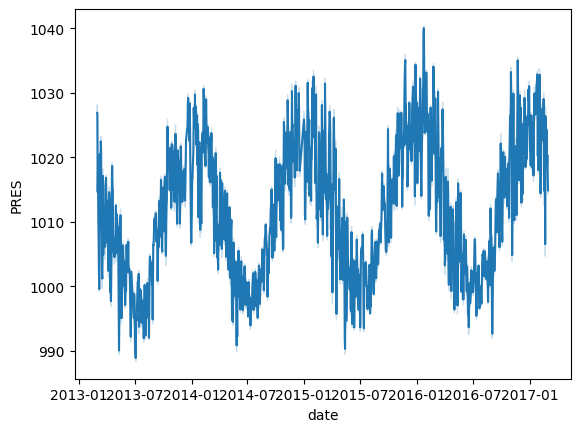

In [2]:
#看看压强和时间的关系
pressure = Air_Quality_Aotizhongxin.groupby(['date','hour'])['PRES'].mean().reset_index()
sns.lineplot(x='date', y='PRES', data=pressure)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='date', ylabel='RAIN'>

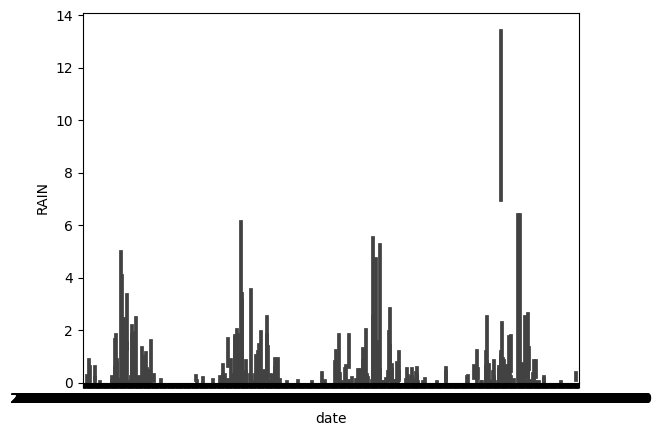

In [3]:
#看看降水和时间的关系
rain = Air_Quality_Aotizhongxin.groupby(['date','hour'])['RAIN'].mean().reset_index()
sns.barplot(x='date', y='RAIN', data=rain)

Now we want to know if there's any hidden relations between pollutants and pressure or rain.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

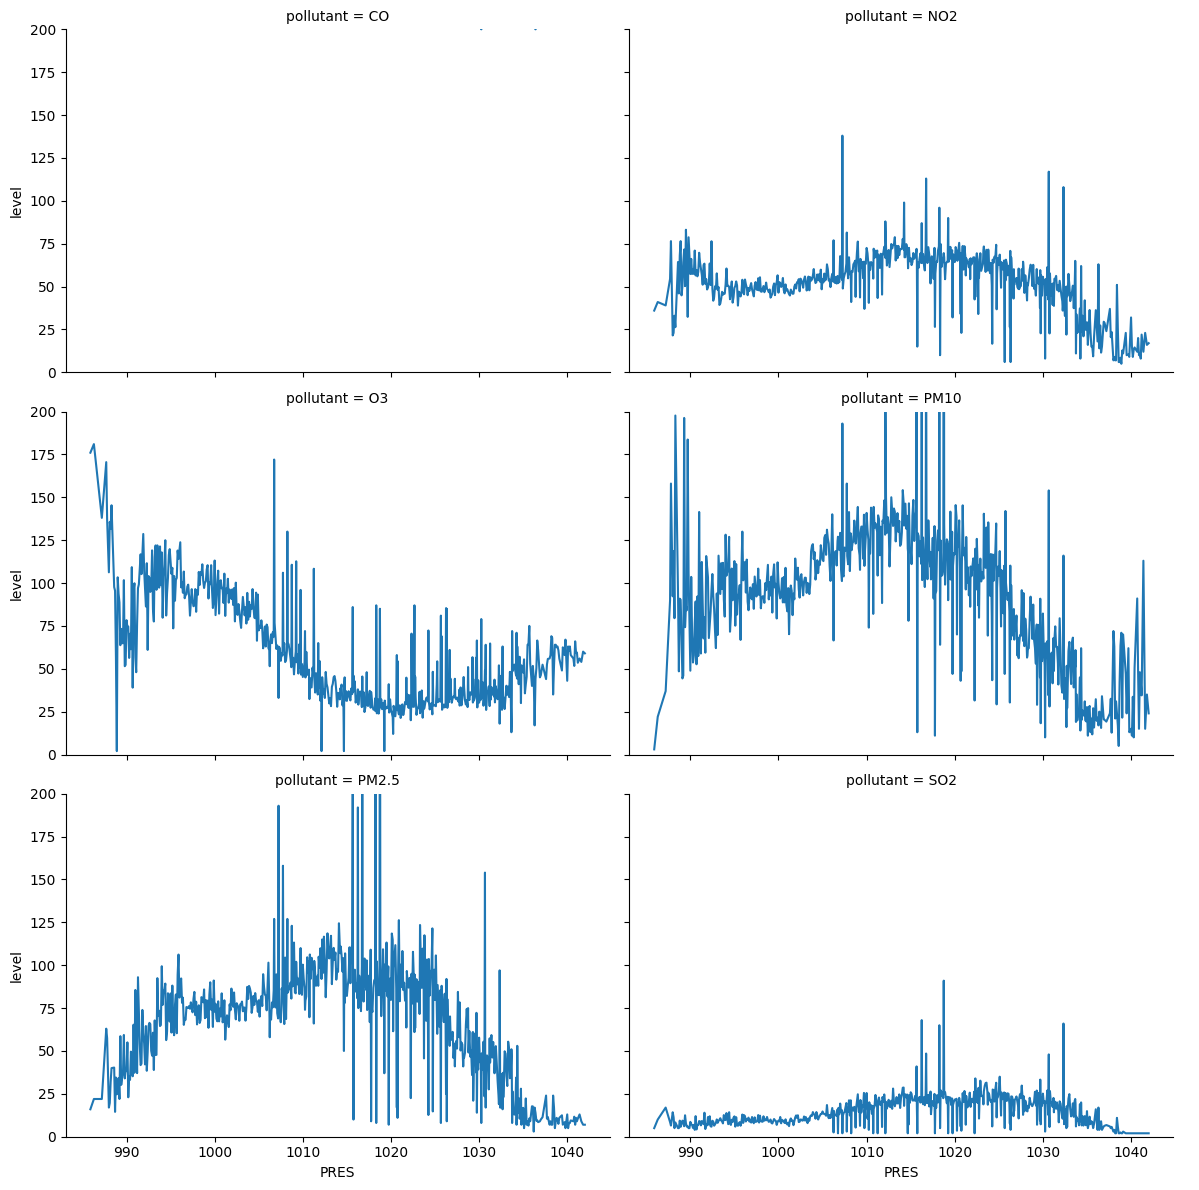

In [4]:
relation_of_pressure = Air_Quality_Aotizhongxin.melt(id_vars='PRES', value_vars=['PM2.5', 'PM10', 'NO2', 'SO2','CO', 'O3'], var_name='pollutant', value_name='level')
# 计算每个压力值下的污染物平均值
average_pollutants_under_pressure = relation_of_pressure.groupby(['PRES', 'pollutant'])['level'].mean().reset_index()

# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_pressure, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'PRES', 'level')
g.set(ylim=(0, 200))

# 添加图例
g.add_legend()

The plot looks ugly, let's try to make it smooth.

C:\Users\PC\AppData\Local\Temp\ipykernel_17456\3553637852.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

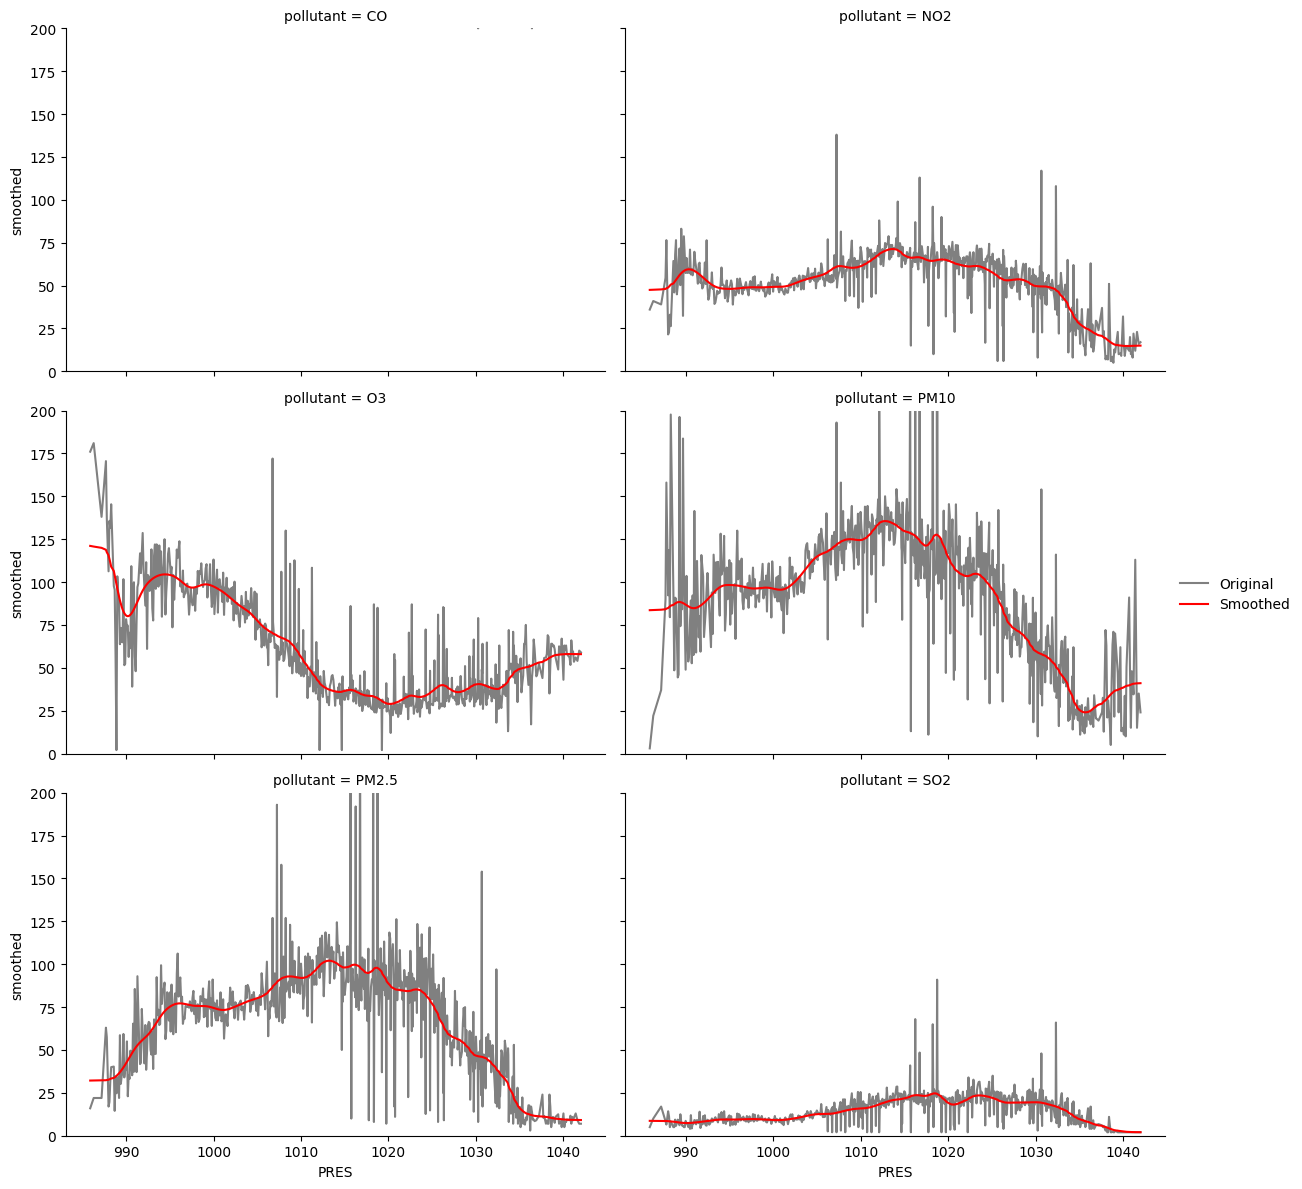

In [5]:
from scipy.ndimage.filters import gaussian_filter1d

# 对每种污染物的数据应用 gaussian_filter1d 函数
average_pollutants_under_pressure['smoothed'] = average_pollutants_under_pressure.groupby('pollutant')['level'].transform(lambda x: gaussian_filter1d(x, sigma=10))

# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_pressure, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'PRES', 'level', color='grey', label='Original')

# 绘制平滑后的数据的线图
g.map(sns.lineplot, 'PRES', 'smoothed', color='red', label='Smoothed')
g.set(ylim=(0, 200))

# 添加图例
g.add_legend()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

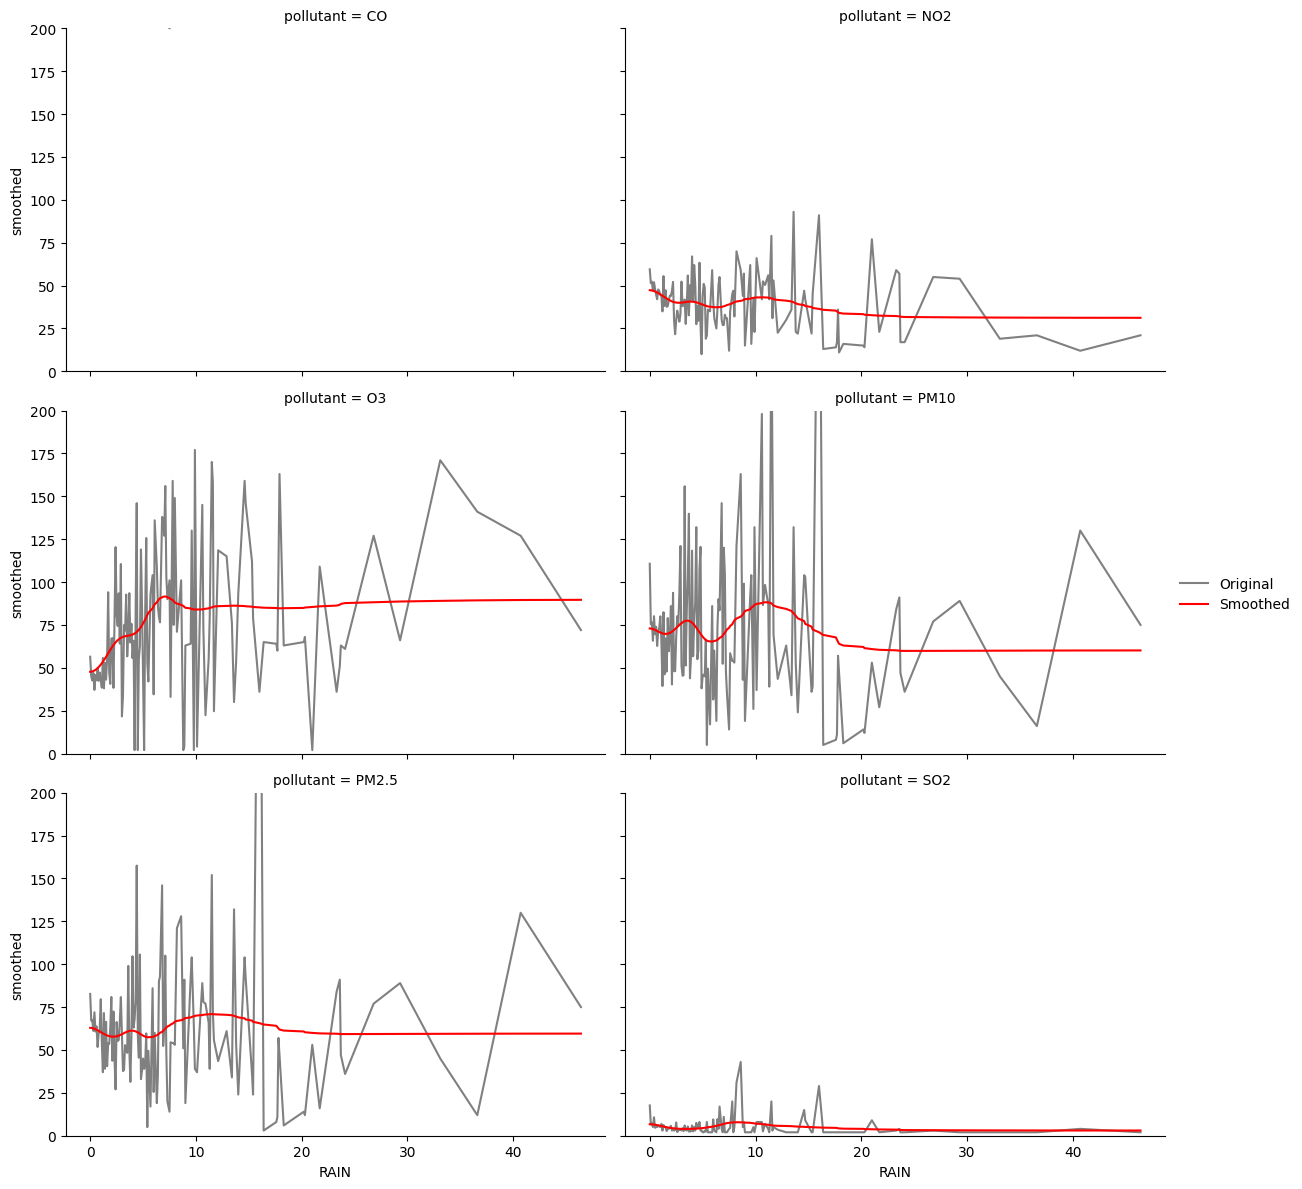

In [6]:
relation_of_rain = Air_Quality_Aotizhongxin.melt(id_vars='RAIN', value_vars=['PM2.5', 'PM10', 'NO2', 'SO2','CO', 'O3'], var_name='pollutant', value_name='level')

average_pollutants_under_rain = relation_of_rain.groupby(['RAIN', 'pollutant'])['level'].mean().reset_index()
average_pollutants_under_rain['smoothed'] = average_pollutants_under_rain.groupby('pollutant')['level'].transform(lambda x: gaussian_filter1d(x, sigma=10))
# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_rain, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'RAIN', 'level', color='grey', label='Original')

# 绘制平滑后的数据的线图
g.map(sns.lineplot, 'RAIN', 'smoothed', color='red', label='Smoothed')
g.set(ylim=(0, 200))
# 添加图例
g.add_legend()

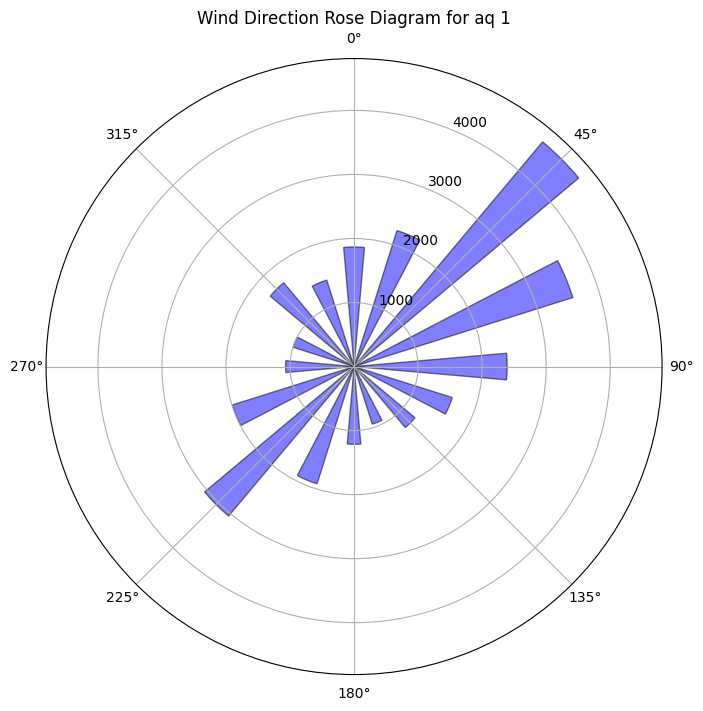

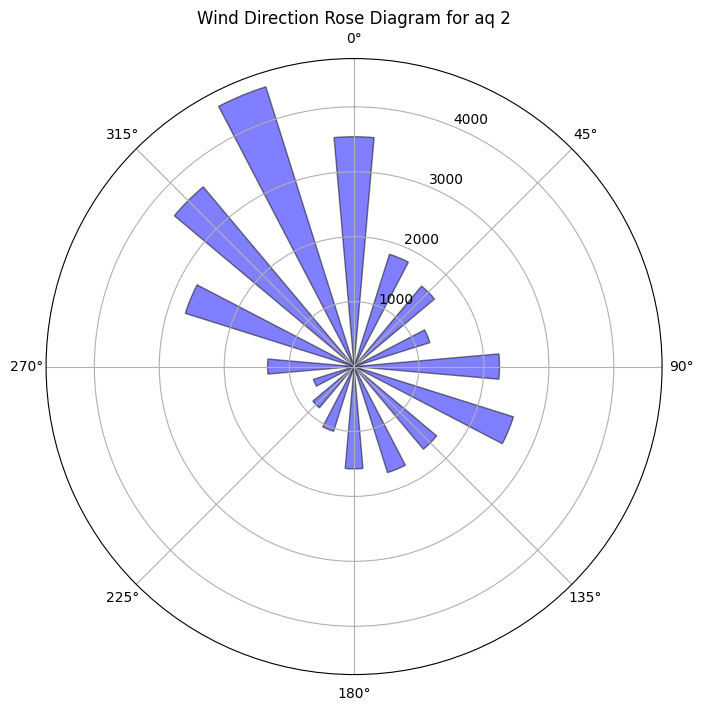

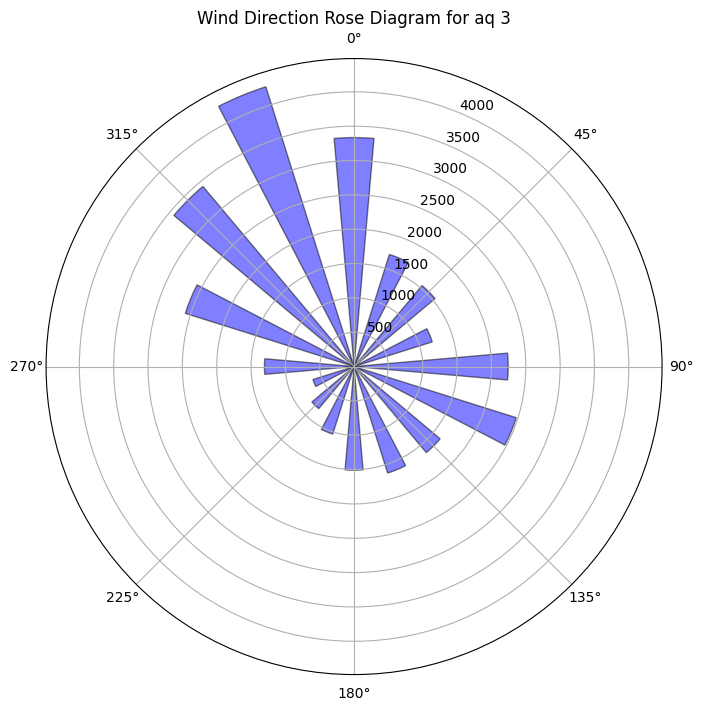

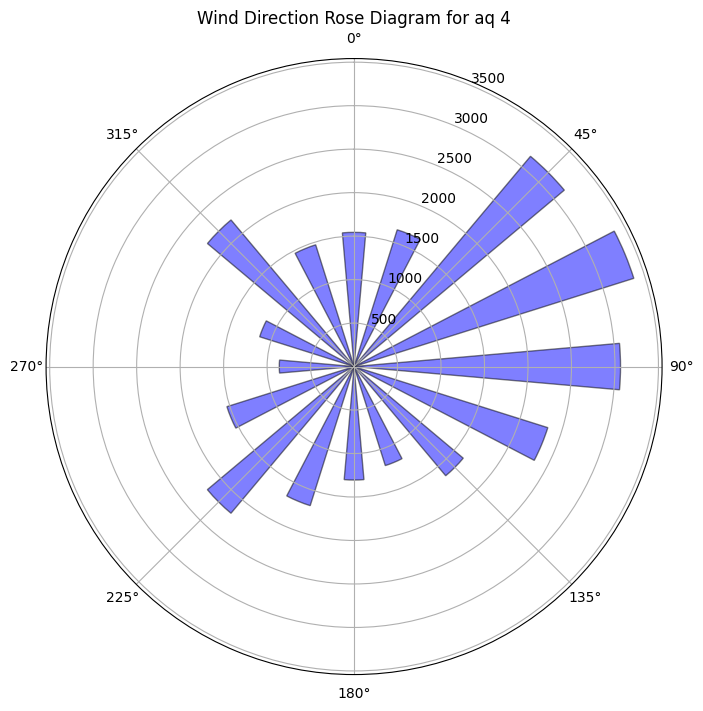

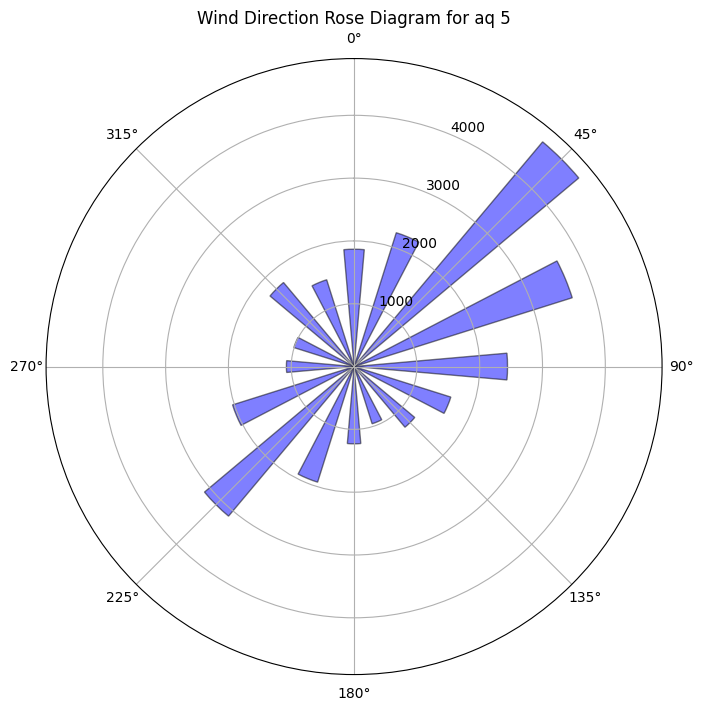

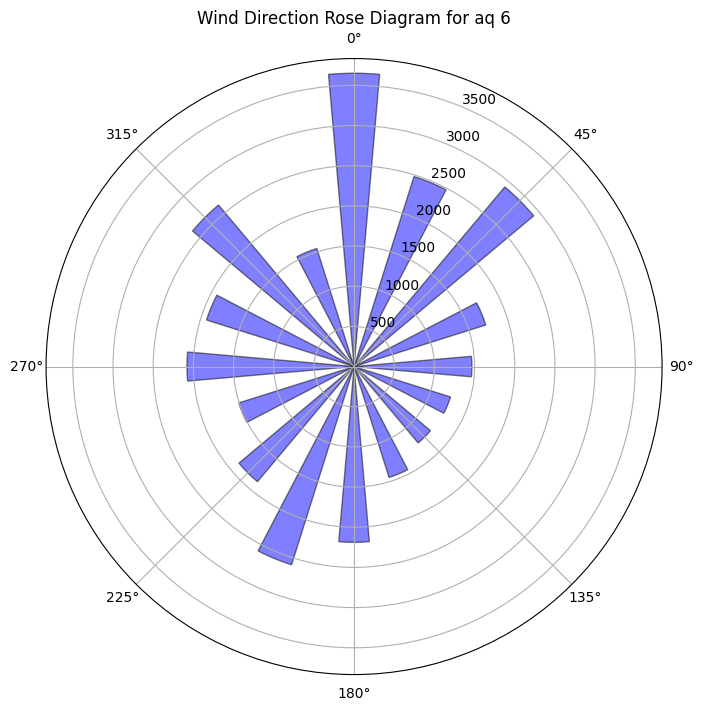

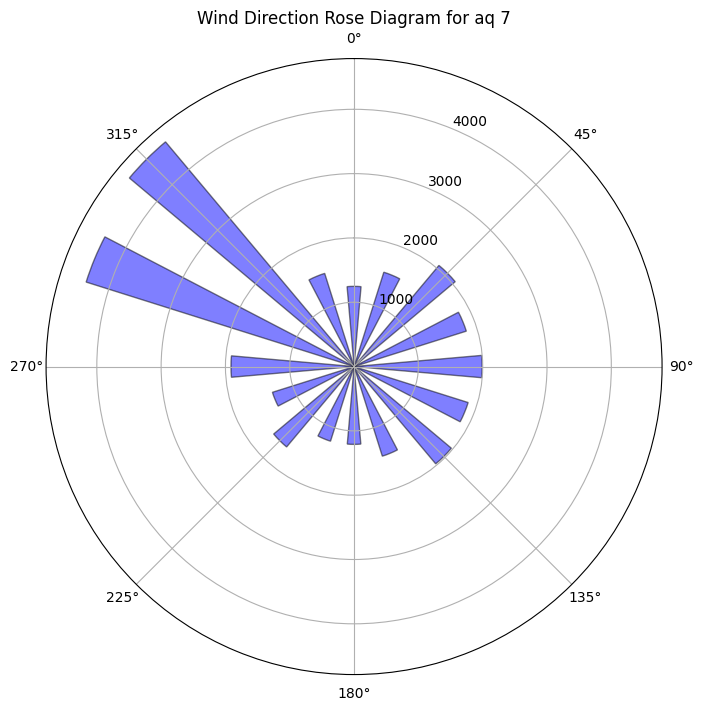

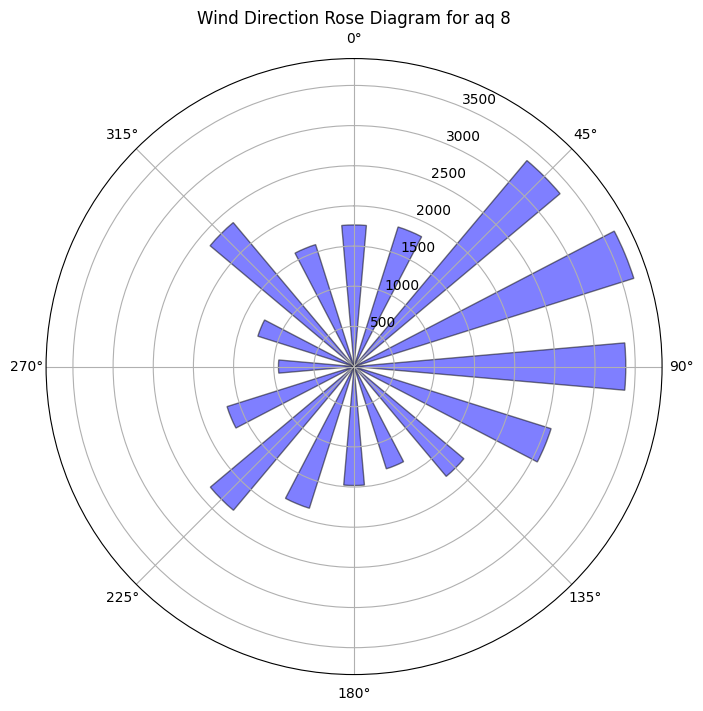

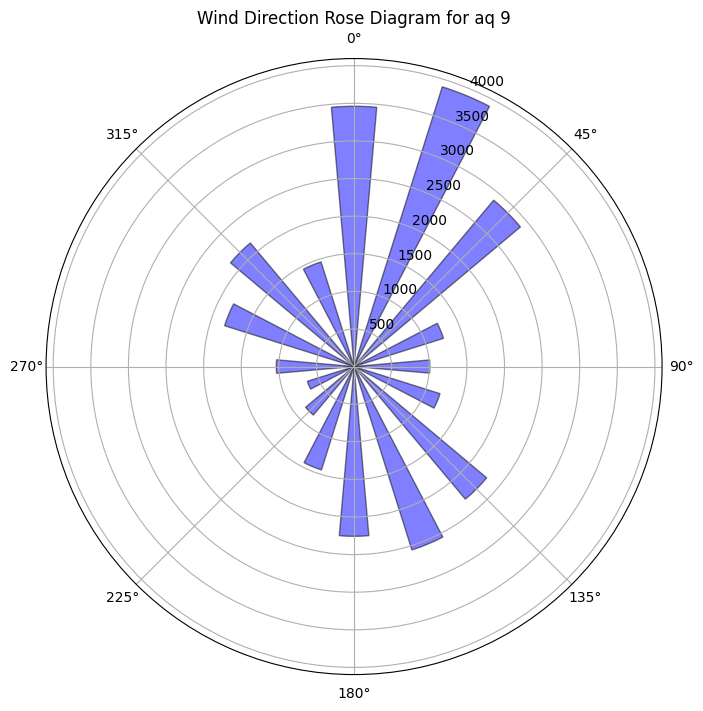

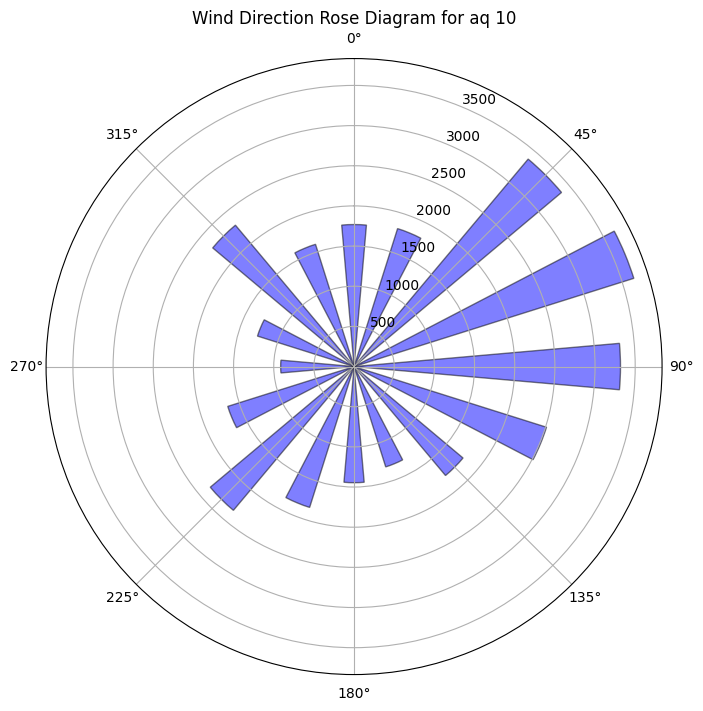

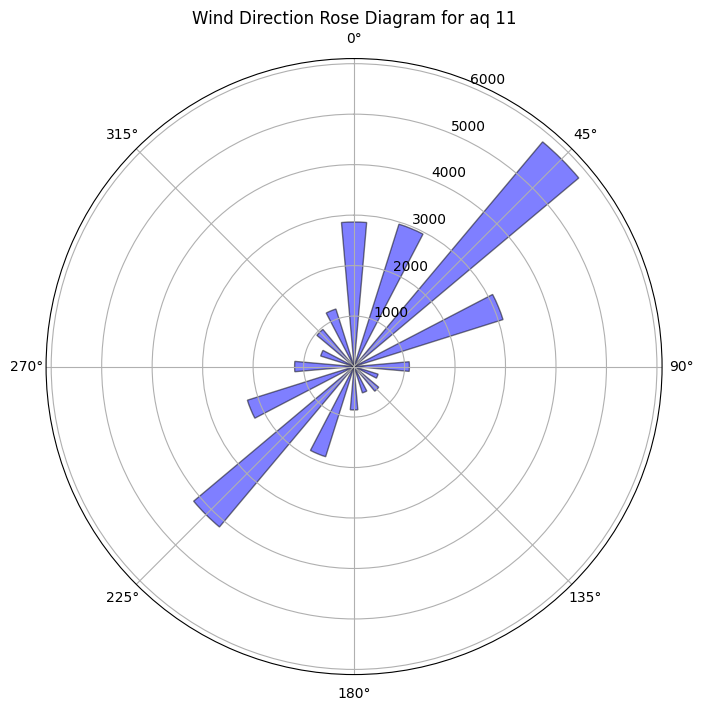

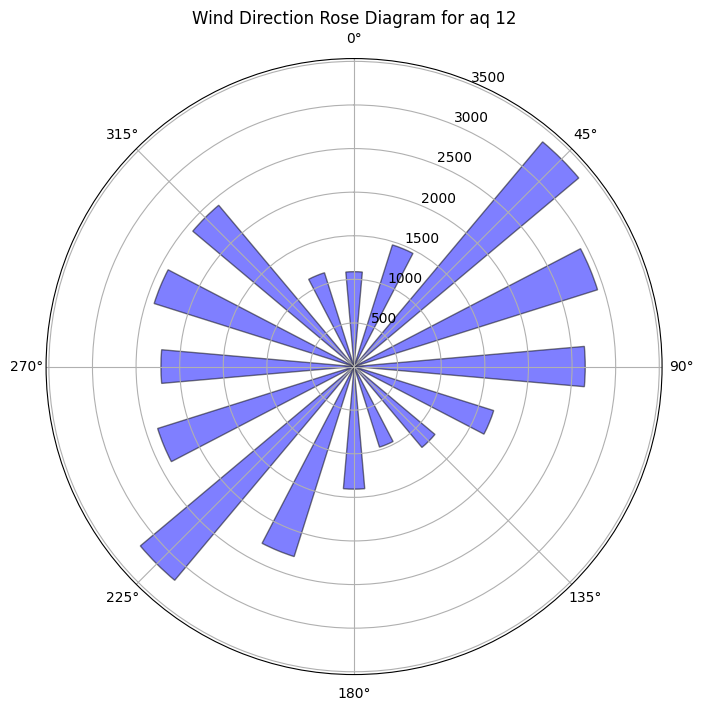

In [14]:
# 定义一个字典，将方向转换为角度
direction_dict = {'N': 0, 'NNE':22.5,'NE': 45, 'ENE':67.5,
                  'E': 90, 'ESE':112.5,'SE': 135,'SSE':157.5, 
                  'S': 180, 'SSW':202.5,'SW': 225,'WSW':247.5, 
                  'W': 270,'WNW':292.5, 'NW': 315,'NNW':337.5}
# 对于 Air_Qualities 中的每个 aq
for i, aq in enumerate(Air_Qualities):
    # 将 'wd' 列中的方向转换为角度
    wind_direction_deg = aq['wd'].map(direction_dict)

    # 计算每个风向的频率
    directions, frequencies = np.unique(wind_direction_deg, return_counts=True)

    # 将风向转换为弧度
    directions_rad = np.deg2rad(directions)

    # 创建极坐标图
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # 绘制风向玫瑰图
    ax.bar(directions_rad, frequencies, width=np.deg2rad(10), edgecolor='k', alpha=0.5, color='b')

    # 设置标题和标签
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    plt.title(f'Wind Direction Rose Diagram for aq {i+1}')

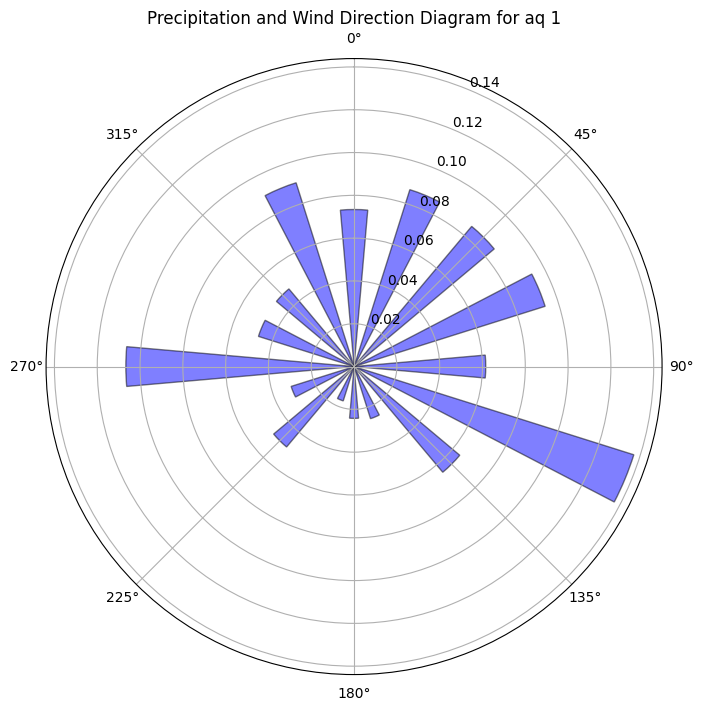

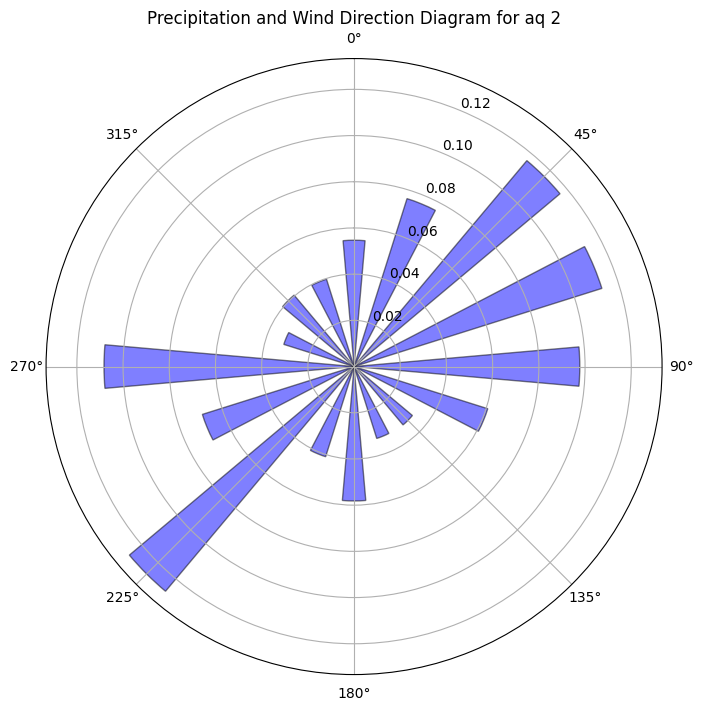

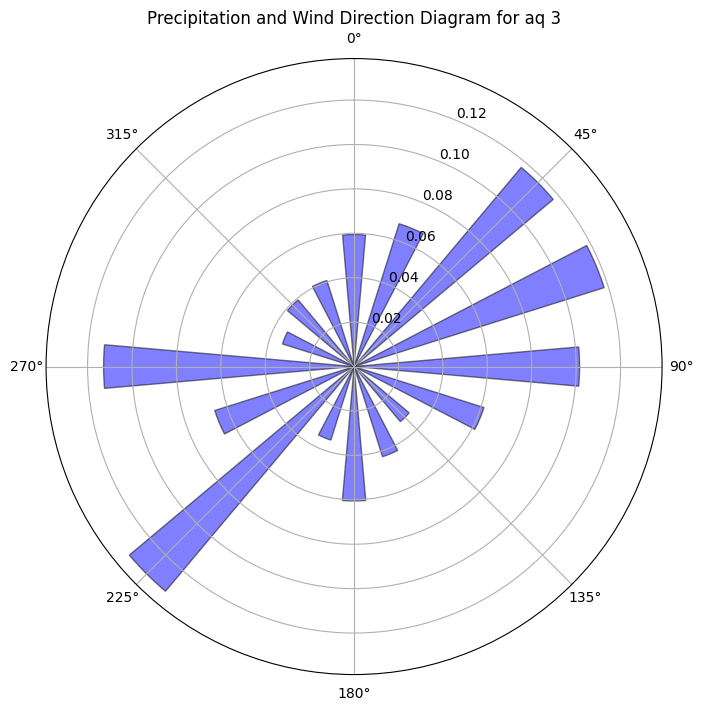

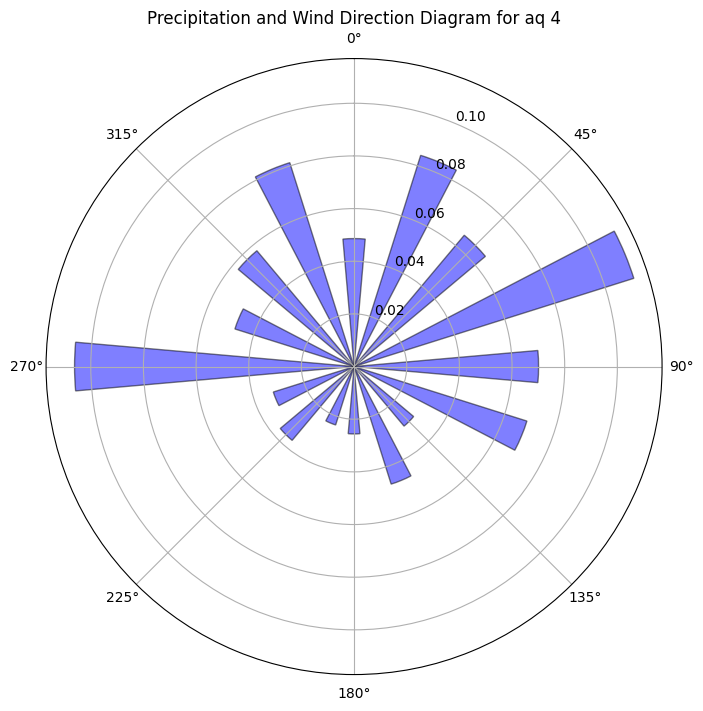

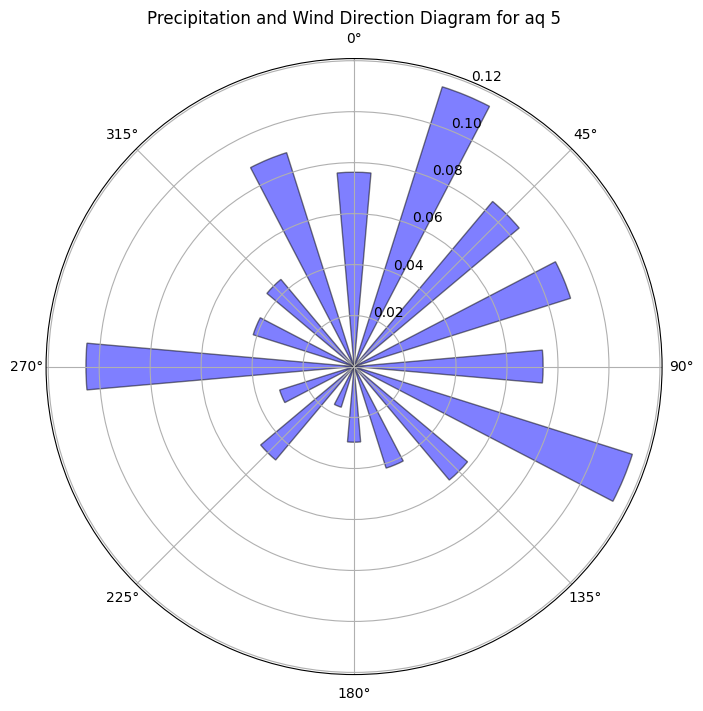

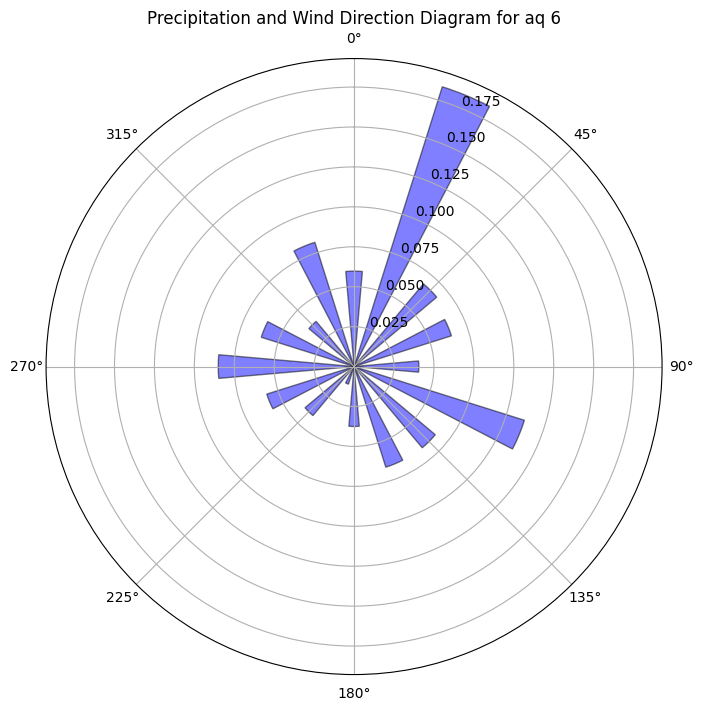

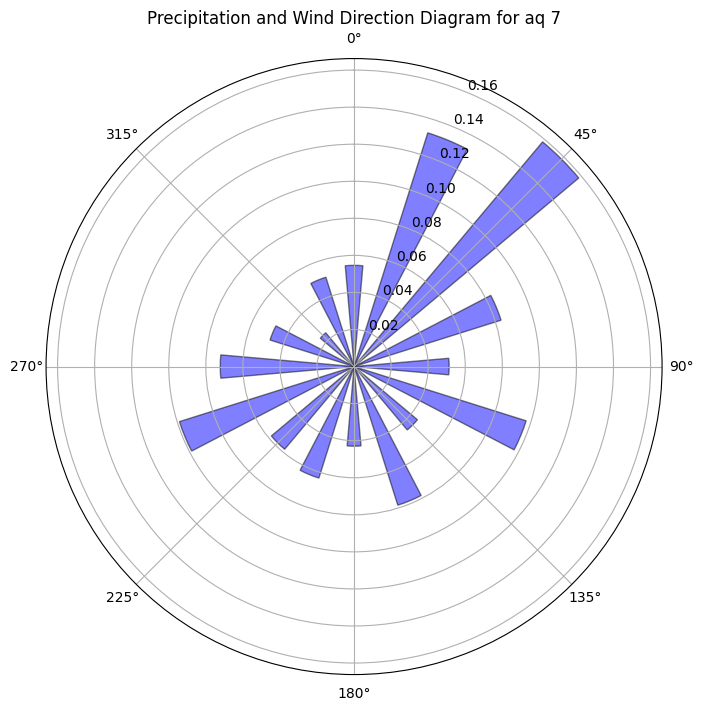

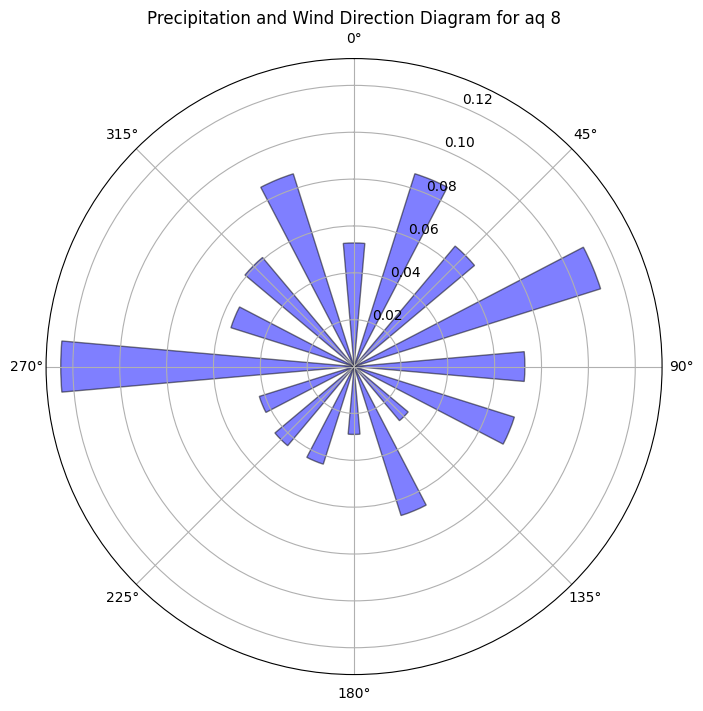

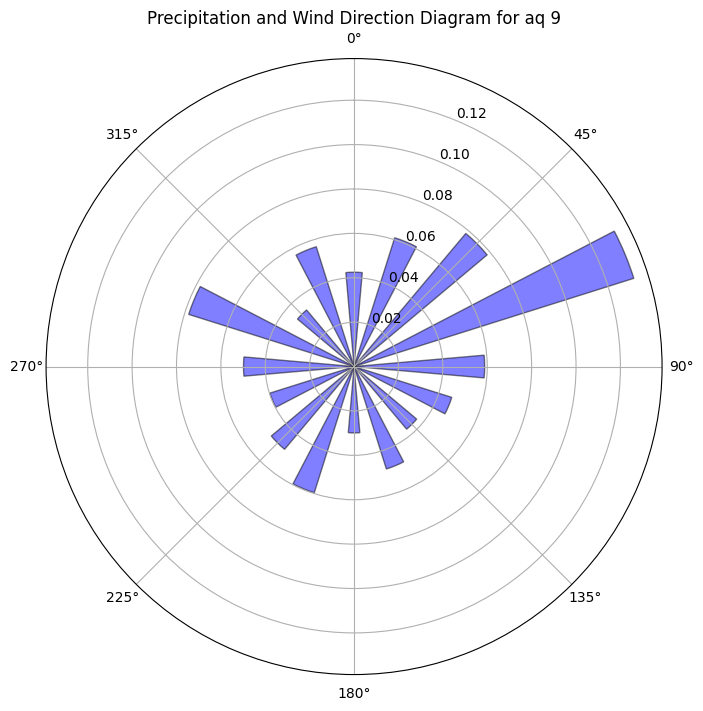

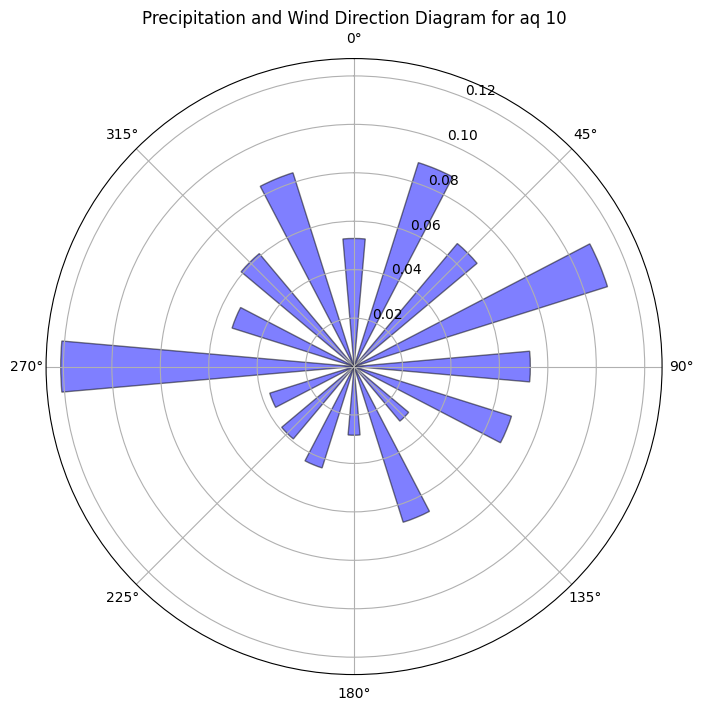

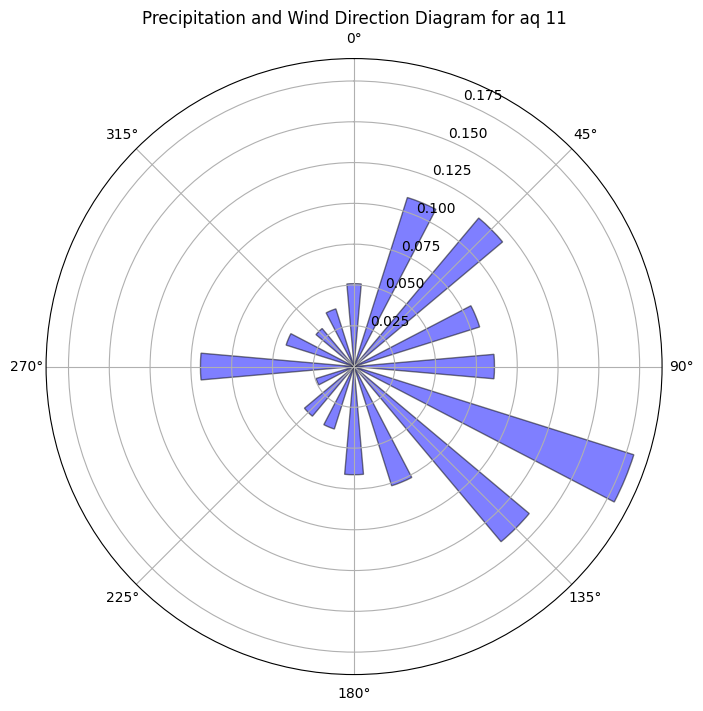

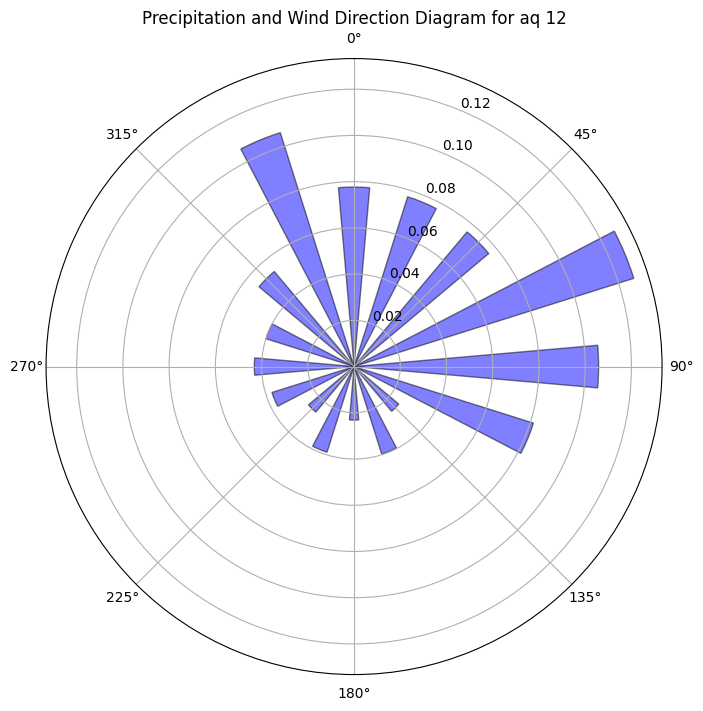

In [15]:
# 对于 Air_Qualities 中的每个 aq
for i, aq in enumerate(Air_Qualities):
    # 计算每个风向的降水量均值
    precipitation_mean = aq.groupby('wd')['RAIN'].mean()

    # 将 'wd' 列中的方向转换为角度
    wind_direction_deg = precipitation_mean.index.map(direction_dict)

    # 如果 wind_direction_deg 为空，就跳过这个 aq
    if wind_direction_deg.size == 0:
        continue

    # 将风向转换为弧度
    directions_rad = np.deg2rad(wind_direction_deg)

    # 创建极坐标图
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # 绘制降水量和风向的图
    ax.bar(directions_rad, precipitation_mean, width=np.deg2rad(10), edgecolor='k', alpha=0.5, color='b')

    # 设置标题和标签
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    plt.title(f'Precipitation and Wind Direction Diagram for aq {i+1}')

    plt.show()

In [ ]:
Air_Quality_Aotizhongxin['IF_RAIN'] = Air_Quality_Aotizhongxin['RAIN'].apply(lambda x: 1 if x > 0 else 0)

